## Kaggle House prediction project

In [179]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [180]:
traindata = pd.read_csv('D:/kaggle project/train.csv')
testdata = pd.read_csv('D:/kaggle project/test.csv')

In [181]:
rawtraindata = traindata.copy()
rawtestdata = testdata.copy()

In [182]:
traindata

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL        65.00     8450   Pave   NaN      Reg   
1        2          20       RL        80.00     9600   Pave   NaN      Reg   
2        3          60       RL        68.00    11250   Pave   NaN      IR1   
3        4          70       RL        60.00     9550   Pave   NaN      IR1   
4        5          60       RL        84.00    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL        62.00     7917   Pave   NaN      Reg   
1456  1457          20       RL        85.00    13175   Pave   NaN      Reg   
1457  1458          70       RL        66.00     9042   Pave   NaN      Reg   
1458  1459          20       RL        68.00     9717   Pave   NaN      Reg   
1459  1460          20       RL        75.00     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [183]:
## Duplicates

if (traindata.duplicated() == True).any():
    print(traindata.duplicated())
else: 
    print('No duplicate')

No duplicate


In [184]:
for i in traindata.columns:
    if traindata[i].isnull().sum() != 0:
        print(i,'.............',traindata[i].isnull().sum())

LotFrontage ............. 259
Alley ............. 1369
MasVnrType ............. 8
MasVnrArea ............. 8
BsmtQual ............. 37
BsmtCond ............. 37
BsmtExposure ............. 38
BsmtFinType1 ............. 37
BsmtFinType2 ............. 38
Electrical ............. 1
FireplaceQu ............. 690
GarageType ............. 81
GarageYrBlt ............. 81
GarageFinish ............. 81
GarageQual ............. 81
GarageCond ............. 81
PoolQC ............. 1453
Fence ............. 1179
MiscFeature ............. 1406


In [185]:
for i in testdata.columns:
    if testdata[i].isnull().sum() != 0:
        print(i,'.............',testdata[i].isnull().sum())

MSZoning ............. 4
LotFrontage ............. 227
Alley ............. 1352
Utilities ............. 2
Exterior1st ............. 1
Exterior2nd ............. 1
MasVnrType ............. 16
MasVnrArea ............. 15
BsmtQual ............. 44
BsmtCond ............. 45
BsmtExposure ............. 44
BsmtFinType1 ............. 42
BsmtFinSF1 ............. 1
BsmtFinType2 ............. 42
BsmtFinSF2 ............. 1
BsmtUnfSF ............. 1
TotalBsmtSF ............. 1
BsmtFullBath ............. 2
BsmtHalfBath ............. 2
KitchenQual ............. 1
Functional ............. 2
FireplaceQu ............. 730
GarageType ............. 76
GarageYrBlt ............. 78
GarageFinish ............. 78
GarageCars ............. 1
GarageArea ............. 1
GarageQual ............. 78
GarageCond ............. 78
PoolQC ............. 1456
Fence ............. 1169
MiscFeature ............. 1408
SaleType ............. 1


In [186]:
del_col = ['Id','Alley','PoolQC','Fence','MiscFeature']
for i in del_col:
    traindata = traindata.drop(i,axis=1,)
    testdata = testdata.drop(i,axis=1,)

In [187]:
##numberic feature

numberic_featrue = []
for feature in traindata.columns:
    if traindata[feature].dtypes == 'int64':
        numberic_featrue.append(feature)
    elif traindata[feature].dtypes == 'float64':
        numberic_featrue.append(feature)

In [188]:
categorical_featrue = []
for i in traindata.columns:
    if traindata[i].dtype == 'O':
        categorical_featrue.append(i)

In [189]:
import plotly.express as px
import cufflinks as cf

import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [190]:
for i in range(len(numberic_featrue)):
    traindata[numberic_featrue[i]].iplot(kind='hist',
                           xTitle=numberic_featrue[i],
                           linecolor='black',
                           yTitle='count',
                           title=f'{numberic_featrue[i]} vs count')

In [191]:
for i in range(len(categorical_featrue)):
    traindata[categorical_featrue[i]].iplot(kind='hist',
                           xTitle=categorical_featrue[i],
                           linecolor='black',
                           yTitle='count',
                           title=f'{categorical_featrue[i]} vs count')

In [192]:
print(traindata.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [193]:
traindata[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]

BsmtFullBath  BsmtHalfBath  FullBath  HalfBath
0                1             0         2         1
1                0             1         2         0
2                1             0         2         1
3                1             0         1         0
4                1             0         2         1
...            ...           ...       ...       ...
1455             0             0         2         1
1456             1             0         2         0
1457             0             0         2         0
1458             1             0         1         0
1459             1             0         1         1

[1460 rows x 4 columns]

In [194]:
# BsmtFullBath: Basement full bathrooms, BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade, HalfBath: Half baths above grade
traindata['Total_bathroom'] = traindata['BsmtFullBath'] +traindata['FullBath'] + traindata['BsmtHalfBath'] + traindata['HalfBath']
traindata.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True)

testdata['Total_bathroom'] = testdata['BsmtFullBath'] +testdata['FullBath'] + testdata['BsmtHalfBath'] + testdata['HalfBath']
testdata.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True)

In [195]:
traindata[['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF']]

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF
0            706           0        150
1            978           0        284
2            486           0        434
3            216           0        540
4            655           0        490
...          ...         ...        ...
1455           0           0        953
1456         790         163        589
1457         275           0        877
1458          49        1029          0
1459         830         290        136

[1460 rows x 3 columns]

In [196]:
#BsmtFinSF1: Type 1 finished square feet, BsmtFinSF2: Type 2 finished square feet
#BsmtUnfSF: Unfinished square feet of basement area
traindata['Total_BsmtFinSF'] = traindata['BsmtFinSF1'] + traindata['BsmtFinSF2'] 
testdata['Total_BsmtFinSF'] = testdata['BsmtFinSF1'] + testdata['BsmtFinSF2'] 

In [197]:
traindata[['Total_BsmtFinSF', 'BsmtUnfSF']]

Total_BsmtFinSF  BsmtUnfSF
0                 706        150
1                 978        284
2                 486        434
3                 216        540
4                 655        490
...               ...        ...
1455                0        953
1456              953        589
1457              275        877
1458             1078          0
1459             1120        136

[1460 rows x 2 columns]

In [198]:
traindata.drop(columns=['BsmtFinSF1', 'BsmtFinSF2'], inplace=True)
testdata.drop(columns=['BsmtFinSF1', 'BsmtFinSF2'], inplace=True)

In [199]:
#OpenPorchSF: Open porch area in square feet, EnclosedPorch: Enclosed porch area in square feet
#3SsnPorch: Three season porch area in square feet, ScreenPorch: Screen porch area in square feet
traindata['PorchSF'] = traindata['OpenPorchSF'] + traindata['EnclosedPorch'] + traindata['3SsnPorch'] + traindata['ScreenPorch']
testdata['PorchSF'] = testdata['OpenPorchSF'] + testdata['EnclosedPorch'] + testdata['3SsnPorch'] + testdata['ScreenPorch']

In [200]:
traindata.drop(columns=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace=True)
testdata.drop(columns=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace=True)

In [201]:
traindata[['1stFlrSF','2ndFlrSF', 'LowQualFinSF']]

1stFlrSF  2ndFlrSF  LowQualFinSF
0          856       854             0
1         1262         0             0
2          920       866             0
3          961       756             0
4         1145      1053             0
...        ...       ...           ...
1455       953       694             0
1456      2073         0             0
1457      1188      1152             0
1458      1078         0             0
1459      1256         0             0

[1460 rows x 3 columns]

In [202]:
#1stFlrSF: First Floor square feet, 2ndFlrSF: Second floor square feet, LowQualFinSF: Low quality finished square feet (all floors)
traindata['Total_FlrSF'] = traindata['1stFlrSF'] + traindata['2ndFlrSF'] - traindata['LowQualFinSF']
testdata['Total_FlrSF'] = testdata['1stFlrSF'] + testdata['2ndFlrSF'] - testdata['LowQualFinSF']

In [203]:
traindata.drop(columns=['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], inplace=True)
testdata.drop(columns=['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], inplace=True)

In [204]:
numberic_featrue.clear()

In [205]:
##numberic feature

numberic_featrue = []
for feature in traindata.columns:
    if traindata[feature].dtypes == 'int64':
        numberic_featrue.append(feature)
    elif traindata[feature].dtypes == 'float64':
        numberic_featrue.append(feature)

In [206]:
print(numberic_featrue)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Total_bathroom', 'Total_BsmtFinSF', 'PorchSF', 'Total_FlrSF']


In [207]:
traindata.drop(columns=['PoolArea'], inplace=True)
testdata.drop(columns=['PoolArea'], inplace=True)

In [208]:
for i in traindata.columns:
    if traindata[i].isnull().sum() != 0:
        print(i,'.............',traindata[i].isnull().sum())

LotFrontage ............. 259
MasVnrType ............. 8
MasVnrArea ............. 8
BsmtQual ............. 37
BsmtCond ............. 37
BsmtExposure ............. 38
BsmtFinType1 ............. 37
BsmtFinType2 ............. 38
Electrical ............. 1
FireplaceQu ............. 690
GarageType ............. 81
GarageYrBlt ............. 81
GarageFinish ............. 81
GarageQual ............. 81
GarageCond ............. 81


In [209]:
traindata.drop(columns=['FireplaceQu'], inplace=True)
testdata.drop(columns=['FireplaceQu'], inplace=True)

In [210]:
traindata[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
          'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

LotFrontage MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0           65.00    BrkFace      196.00       Gd       TA           No   
1           80.00       None        0.00       Gd       TA           Gd   
2           68.00    BrkFace      162.00       Gd       TA           Mn   
3           60.00       None        0.00       TA       Gd           No   
4           84.00    BrkFace      350.00       Gd       TA           Av   
...           ...        ...         ...      ...      ...          ...   
1455        62.00       None        0.00       Gd       TA           No   
1456        85.00      Stone      119.00       Gd       TA           No   
1457        66.00       None        0.00       TA       Gd           No   
1458        68.00       None        0.00       TA       TA           Mn   
1459        75.00       None        0.00       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Electrical GarageType  GarageYrBlt  \
0             GLQ          Unf      SBrkr     Attchd      2003.00   
1             ALQ          Unf      SBrkr     Attchd      1976.00   
2             GLQ          Unf      SBrkr     Attchd      2001.00   
3             ALQ          Unf      SBrkr     Detchd      1998.00   
4             GLQ          Unf      SBrkr     Attchd      2000.00   
...           ...          ...        ...        ...          ...   
1455          Unf          Unf      SBrkr     Attchd      1999.00   
1456          ALQ          Rec      SBrkr     Attchd      1978.00   
1457          GLQ          Unf      SBrkr     Attchd      1941.00   
1458          GLQ          Rec      FuseA     Attchd      1950.00   
1459          BLQ          LwQ      SBrkr     Attchd      1965.00   

     GarageFinish GarageQual GarageCond  
0             RFn         TA         TA  
1             RFn         TA         TA  
2             RFn         TA         TA  
3             Unf         TA         TA  
4             RFn         TA         TA  
...           ...        ...        ...  
1455          RFn         TA         TA  
1456          Unf         TA         TA  
1457          RFn         TA         TA  
1458          Unf         TA         TA  
1459          Fin         TA         TA  

[1460 rows x 14 columns]

In [211]:
for i in ['MasVnrType','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
          'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    traindata[i] = traindata[i].replace(to_replace = np.nan, value = "None", inplace = False)
    testdata[i] = testdata[i].replace(to_replace = np.nan, value = "None", inplace = False)

In [212]:
for i in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    traindata[i] = traindata[i].fillna(0)
    testdata[i] = testdata[i].fillna(0)

In [213]:
for i in testdata.columns:
    if testdata[i].isnull().sum() != 0:
        print(i,'.............',testdata[i].isnull().sum(), testdata[i].dtype)

MSZoning ............. 4 object
Utilities ............. 2 object
Exterior1st ............. 1 object
Exterior2nd ............. 1 object
BsmtUnfSF ............. 1 float64
TotalBsmtSF ............. 1 float64
KitchenQual ............. 1 object
Functional ............. 2 object
GarageCars ............. 1 float64
GarageArea ............. 1 float64
SaleType ............. 1 object
Total_bathroom ............. 2 float64
Total_BsmtFinSF ............. 1 float64


In [214]:
for i in ['MSZoning','Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']:
    testdata[i] = testdata[i].fillna(testdata[i].mode()[0])

In [215]:
for i in ['TotalBsmtSF', 'GarageCars', 'GarageArea', 'Total_bathroom', 'Total_BsmtFinSF']:
    testdata[i] = testdata[i].fillna(0)

In [216]:
for i in testdata.columns:
    if testdata[i].isnull().sum() != 0:
        print(i,'.............',testdata[i].isnull().sum(), testdata[i].dtype)

BsmtUnfSF ............. 1 float64


In [217]:
testdata['BsmtUnfSF'] = testdata['BsmtUnfSF'].fillna(0)

In [218]:
print('train data shape: ', traindata.shape)
print('test data shape: ', testdata.shape)

train data shape:  (1460, 65)
test data shape:  (1459, 64)


In [219]:
numberic_featrue.clear()

##numberic feature

numberic_featrue = []
for feature in traindata.columns:
    if traindata[feature].dtypes == 'int64' or traindata[feature].dtypes == 'int32':
        numberic_featrue.append(feature)
    elif traindata[feature].dtypes == 'float64':
        numberic_featrue.append(feature)

In [220]:
print(numberic_featrue)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Total_bathroom', 'Total_BsmtFinSF', 'PorchSF', 'Total_FlrSF']


In [221]:
numberic_featrue = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MiscVal', 'MoSold', 'YrSold', 'Total_bathroom', 'Total_BsmtFinSF', 'PorchSF', 'Total_FlrSF', 'SalePrice']

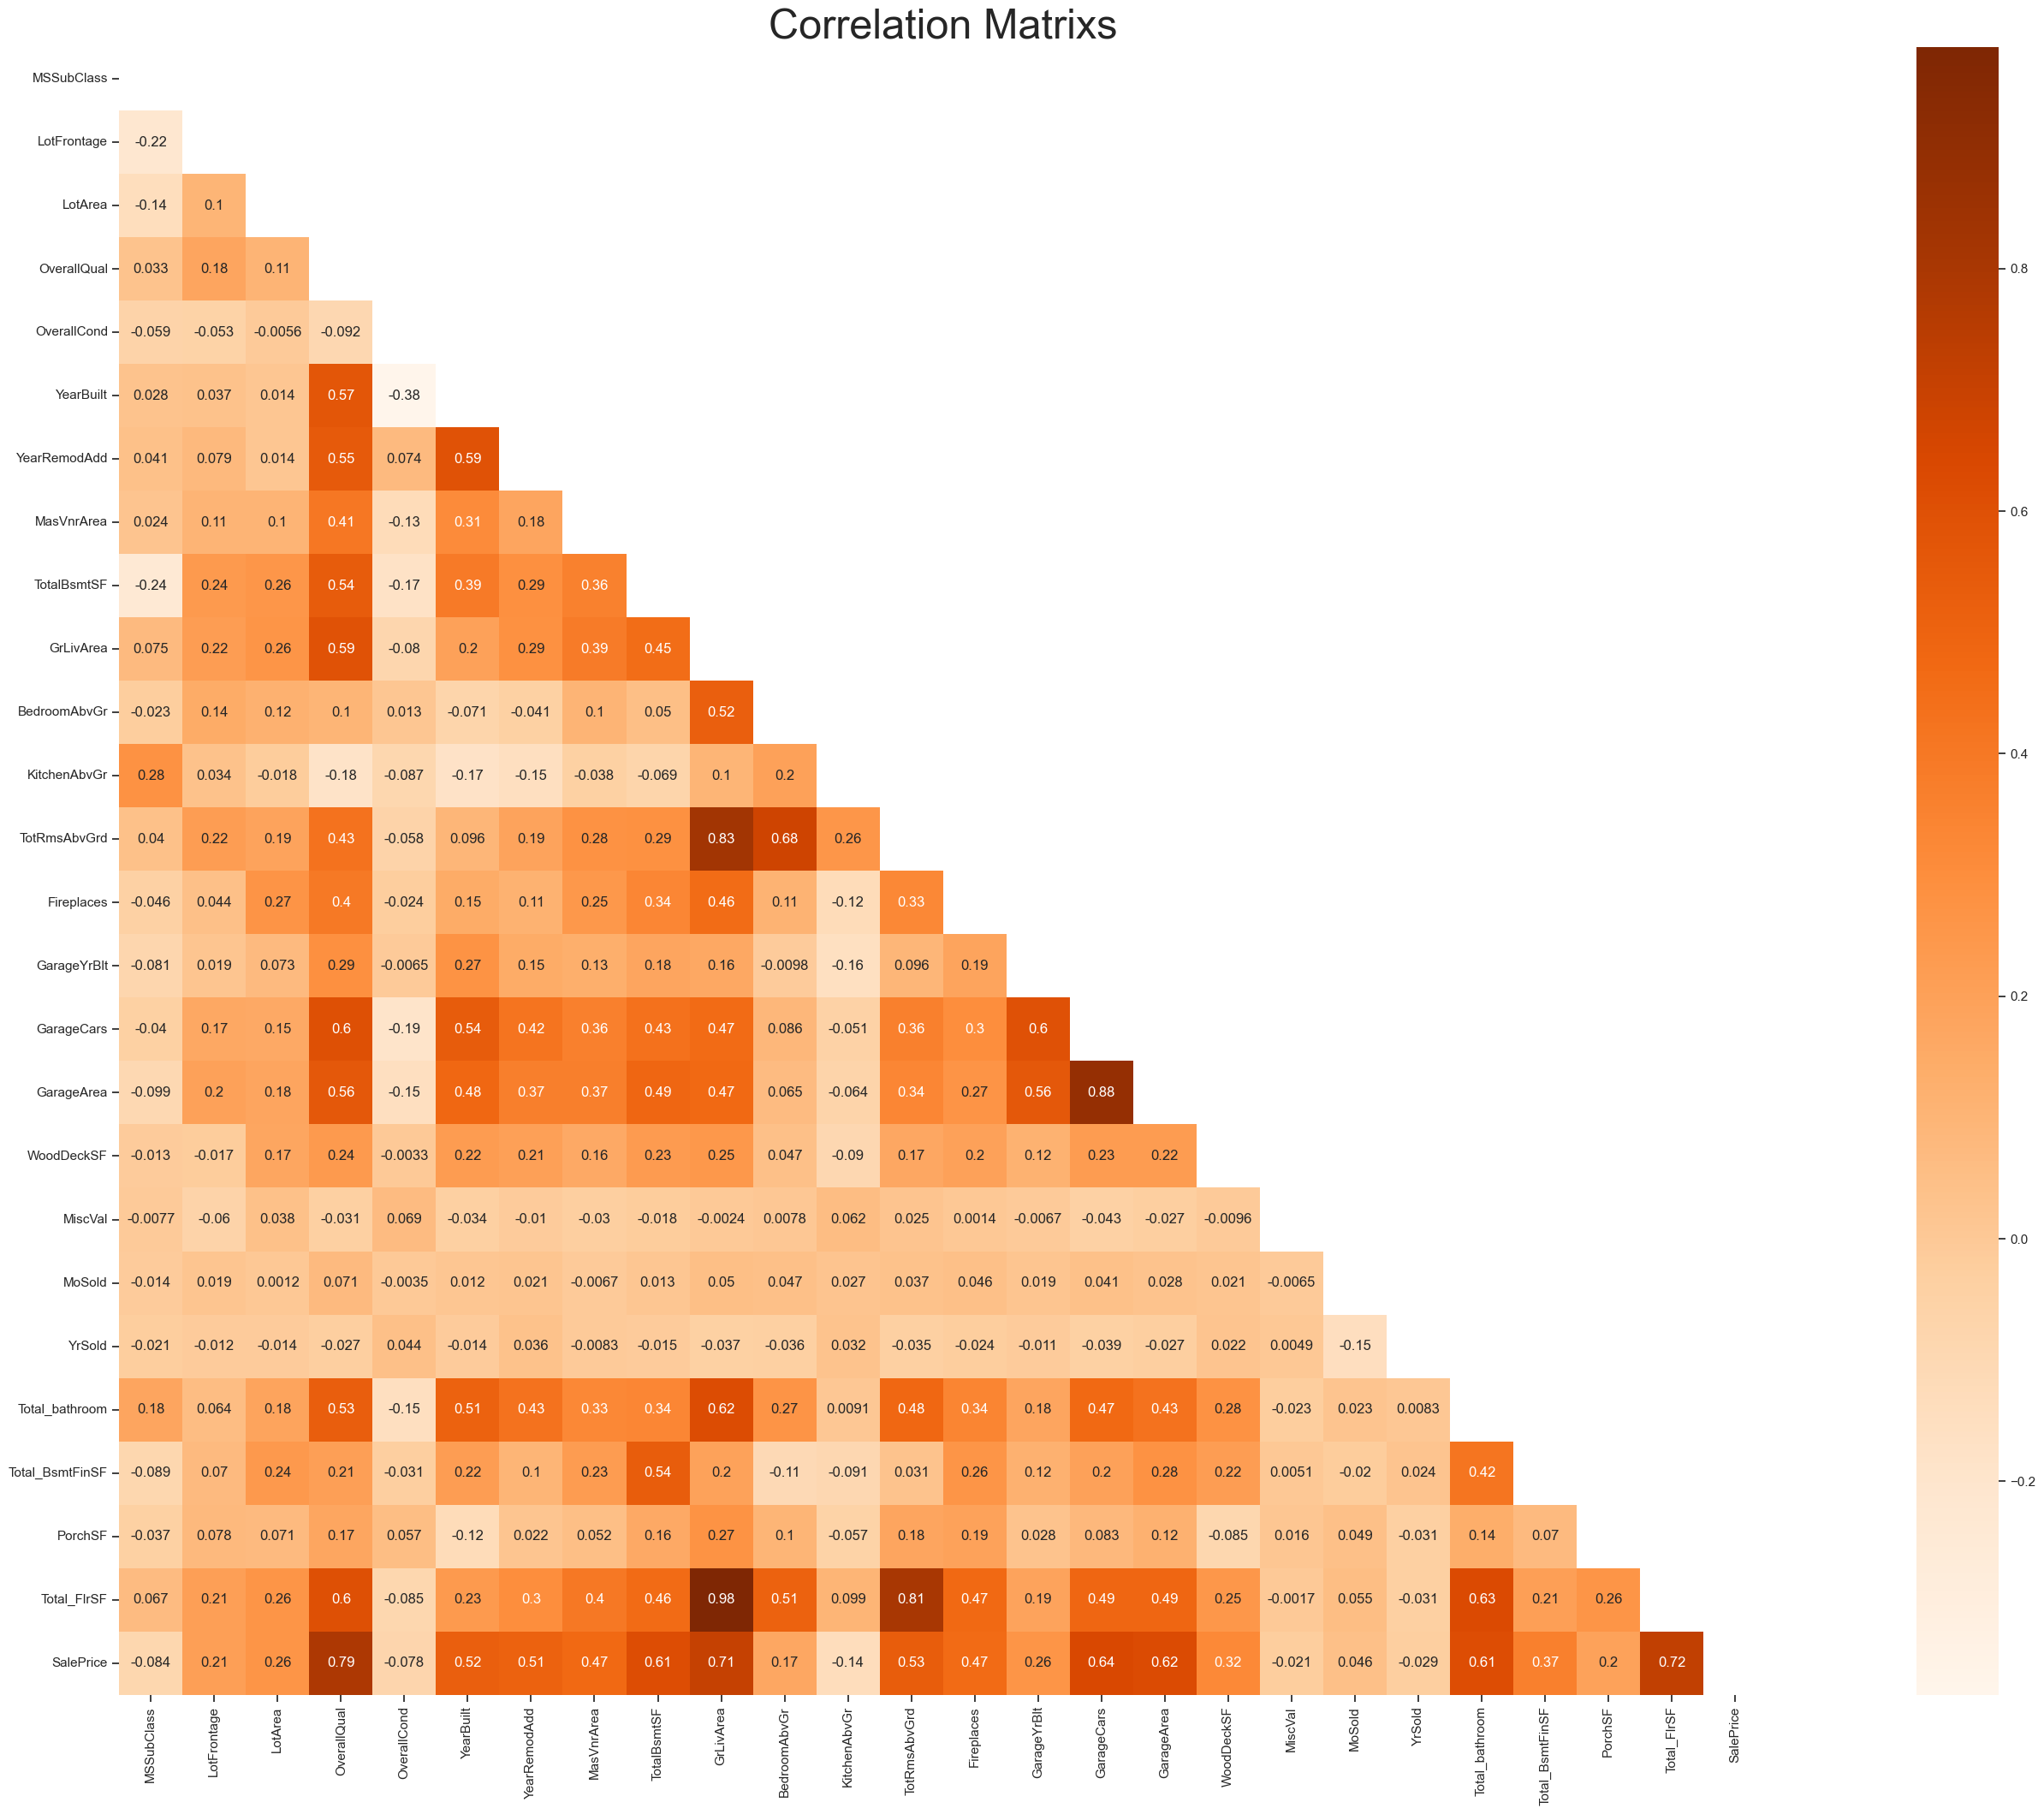

In [222]:
## correlation matrix

sns.set_theme(style="ticks")
# Generate a large random dataset
corr = traindata[numberic_featrue].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axs = plt.subplots(figsize=(45, 25))
sns.heatmap(corr , annot=True, square=True, mask=mask,  cmap="Oranges")
plt.title('Correlation Matrixs', size=35)
plt.show()

In [223]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [224]:
##highly corelated feature
corr_features = correlation(traindata[numberic_featrue], 0.8)
corr_features

{'GarageArea', 'TotRmsAbvGrd', 'Total_FlrSF'}

In [225]:
categorical_featrue.clear()

for i in traindata.columns:
    if traindata[i].dtype == 'O':
        categorical_featrue.append(i)

In [226]:
##categorices to labels

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_featrue:
    traindata[i] = le.fit_transform(traindata[i])
    testdata[i] = le.transform(testdata[i])

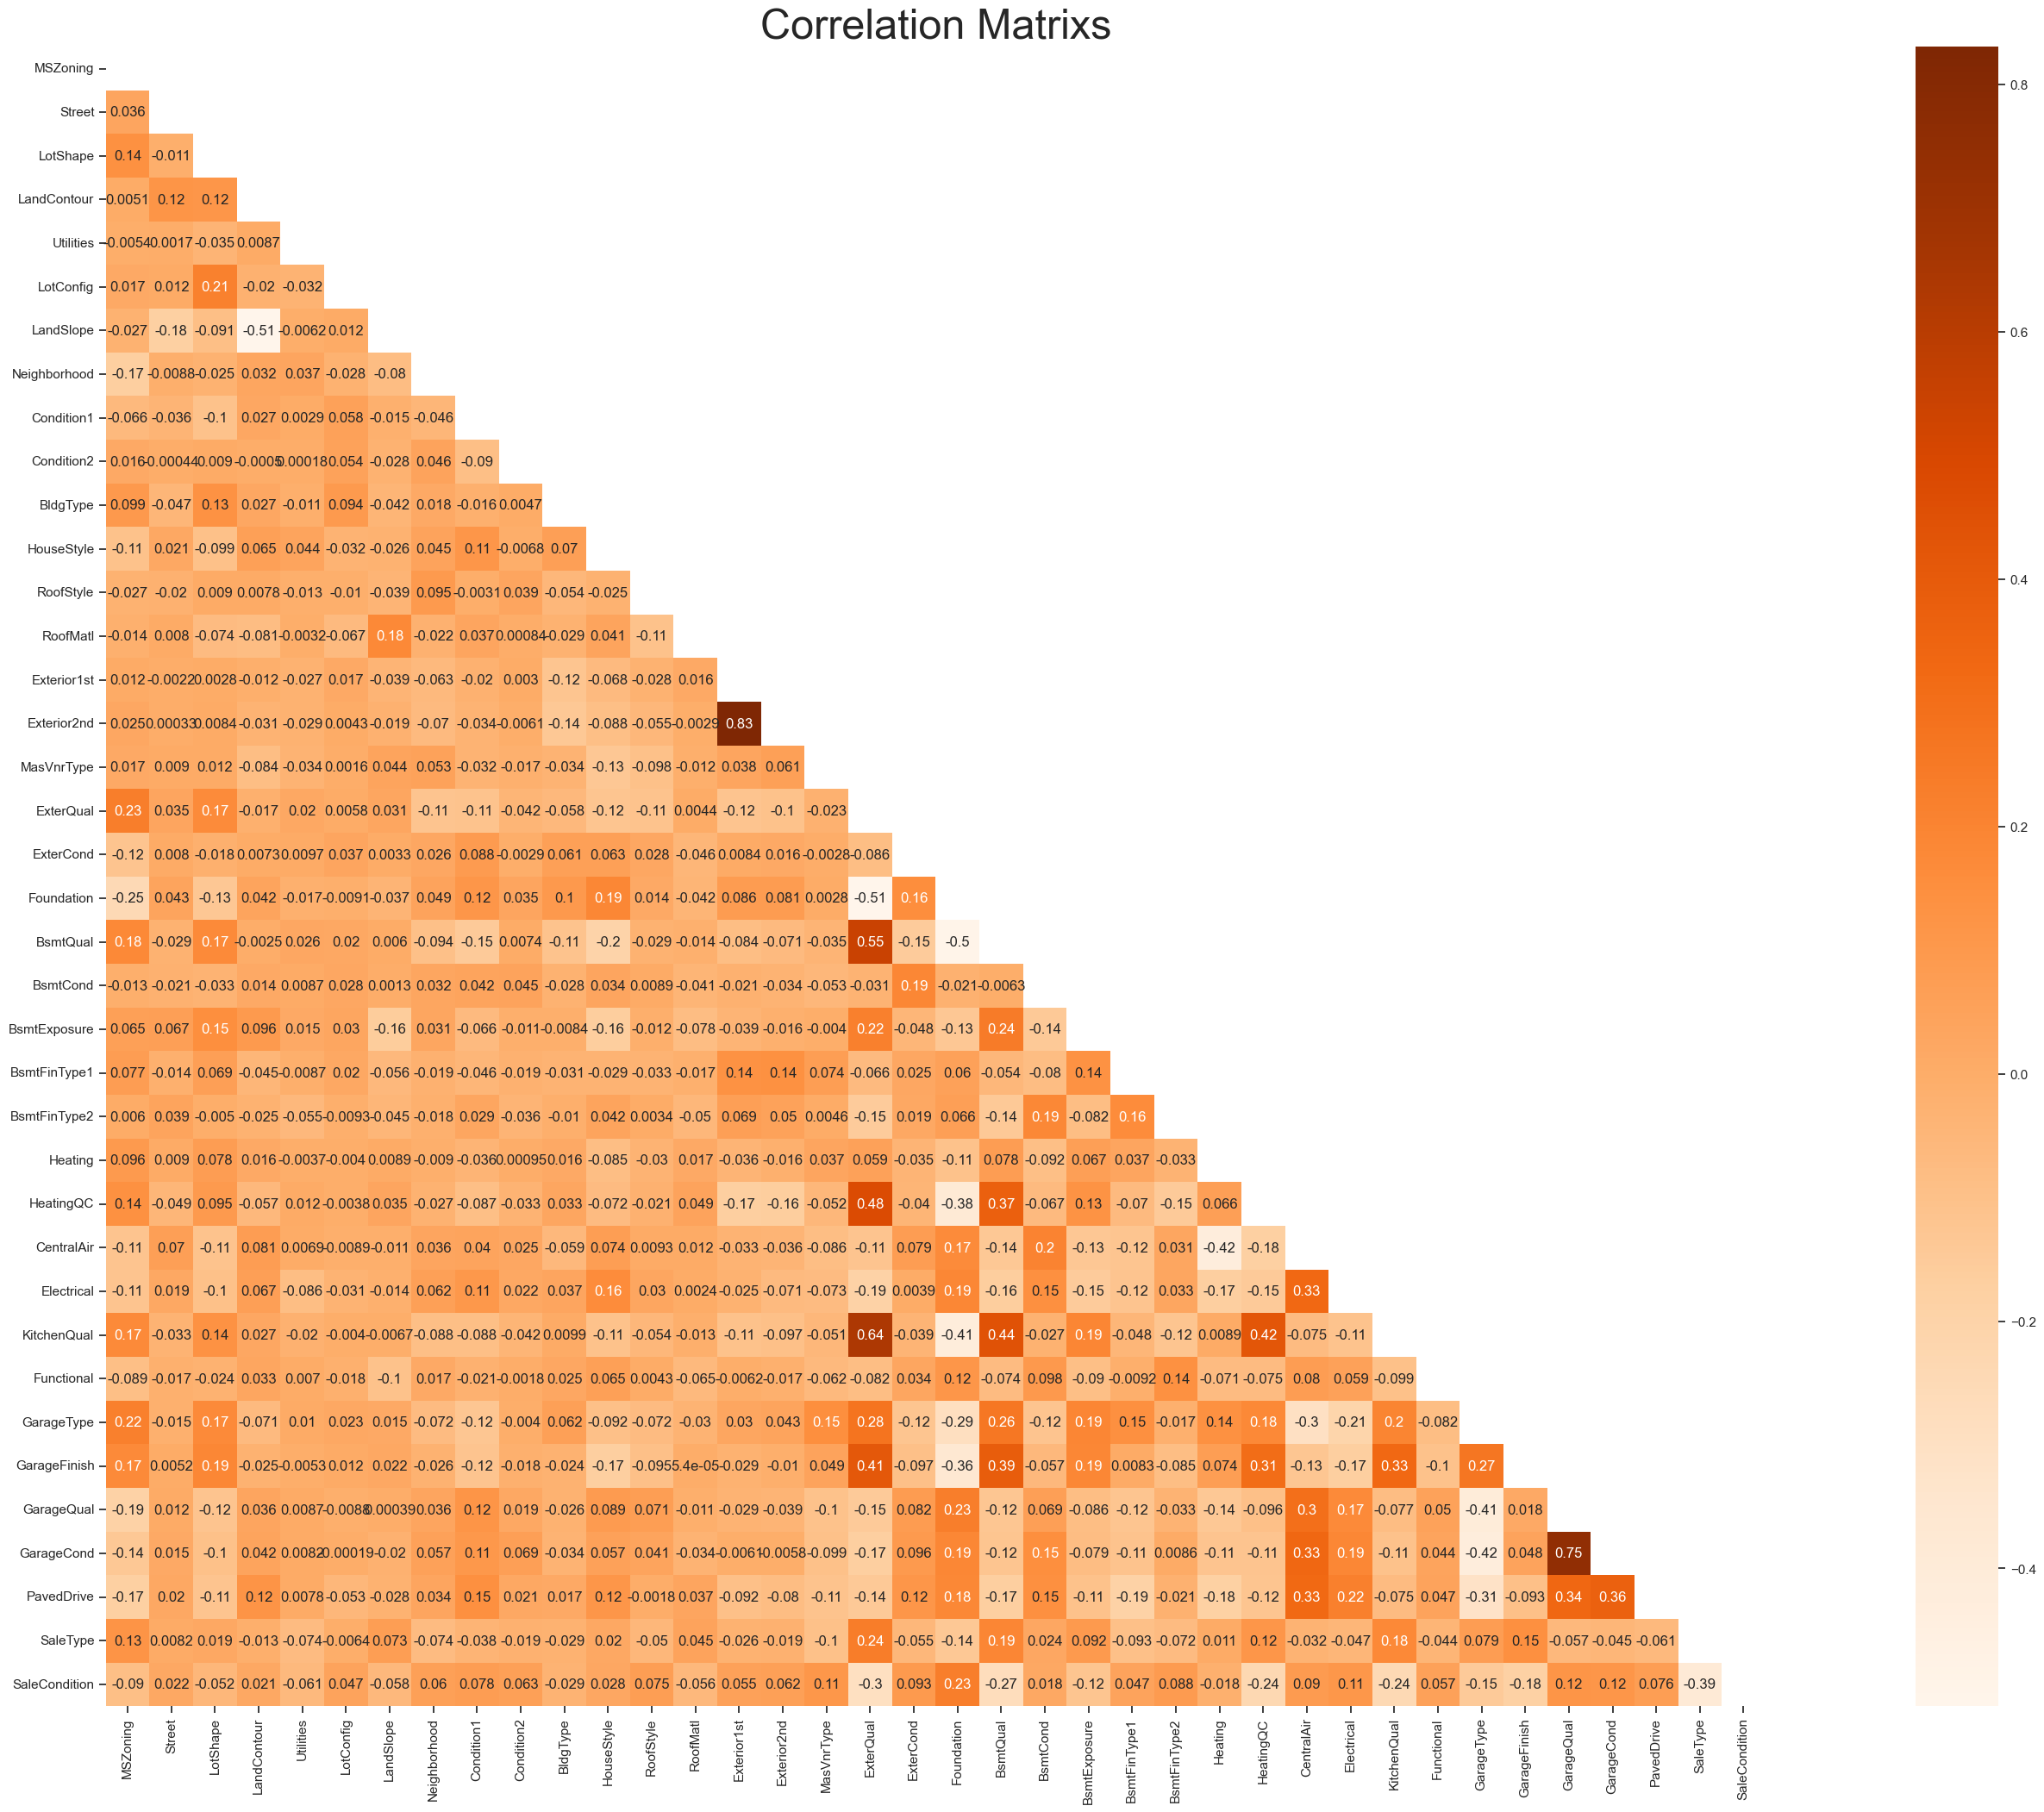

In [227]:
## correlation matrix

sns.set_theme(style="ticks")
# Generate a large random dataset
corr = traindata[categorical_featrue].corr(method='kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axs = plt.subplots(figsize=(45, 25))
sns.heatmap(corr , annot=True, square=True, mask=mask,  cmap="Oranges")
plt.title('Correlation Matrixs', size=35)
plt.show()

In [228]:
##highly corelated feature
corr_features = correlation(traindata[categorical_featrue], 0.8)
corr_features

{'Exterior2nd'}

In [229]:
traindata.to_csv('New train data.csv', index=False)
testdata.to_csv('New test data.csv', index=False)

In [230]:
traindata

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             60         3        65.00     8450       1         3   
1             20         3        80.00     9600       1         3   
2             60         3        68.00    11250       1         0   
3             70         3        60.00     9550       1         0   
4             60         3        84.00    14260       1         0   
...          ...       ...          ...      ...     ...       ...   
1455          60         3        62.00     7917       1         3   
1456          20         3        85.00    13175       1         3   
1457          70         3        66.00     9042       1         3   
1458          20         3        68.00     9717       1         3   
1459          20         3        75.00     9937       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  MiscVal  MoSold  \
0               3          0          4          0  ...        0       2   
1               3          0          2          0  ...        0       5   
2               3          0          4          0  ...        0       9   
3               3          0          0          0  ...        0       2   
4               3          0          2          0  ...        0      12   
...           ...        ...        ...        ...  ...      ...     ...   
1455            3          0          4          0  ...        0       8   
1456            3          0          4          0  ...        0       2   
1457            3          0          4          0  ...     2500       5   
1458            3          0          4          0  ...        0       4   
1459            3          0          4          0  ...        0       6   

      YrSold  SaleType  SaleCondition  SalePrice  Total_bathroom  \
0       2008         8              4     208500               4   
1       2007         8              4     181500               3   
2       2008         8              4     223500               4   
3       2006         8              0     140000               2   
4       2008         8              4     250000               4   
...      ...       ...            ...        ...             ...   
1455    2007         8              4     175000               3   
1456    2010         8              4     210000               3   
1457    2010         8              4     266500               2   
1458    2010         8              4     142125               2   
1459    2008         8              4     147500               3   

      Total_BsmtFinSF  PorchSF  Total_FlrSF  
0                 706       61         1710  
1                 978        0         1262  
2                 486       42         1786  
3                 216      307         1717  
4                 655       84         2198  
...               ...      ...          ...  
1455                0       40         1647  
1456              953        0         2073  
1457              275       60         2340  
1458             1078      112         1078  
1459             1120       68         1256  

[1460 rows x 65 columns]

In [231]:
trainx = traindata.drop('SalePrice', axis=1)

In [232]:
trainy = traindata['SalePrice']

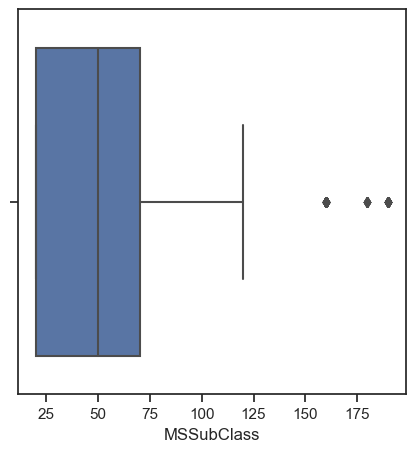

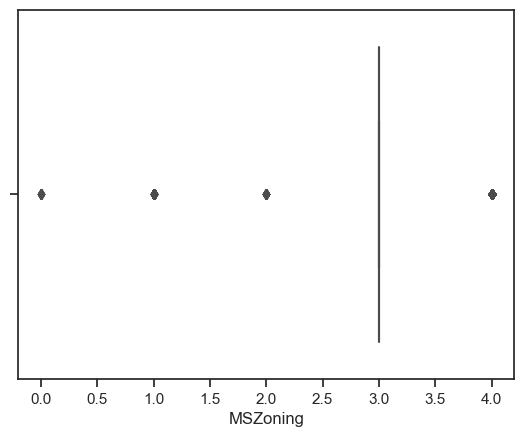

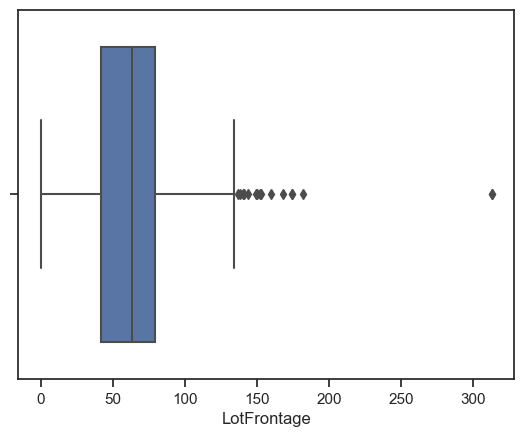

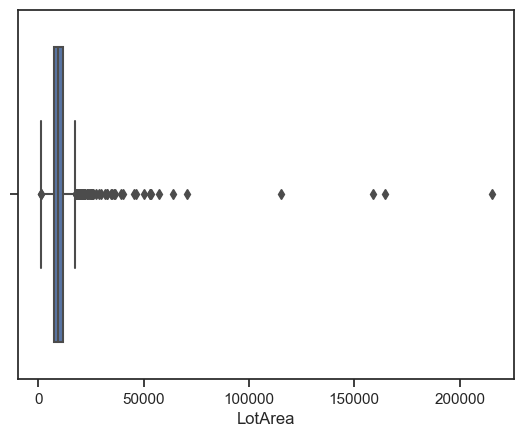

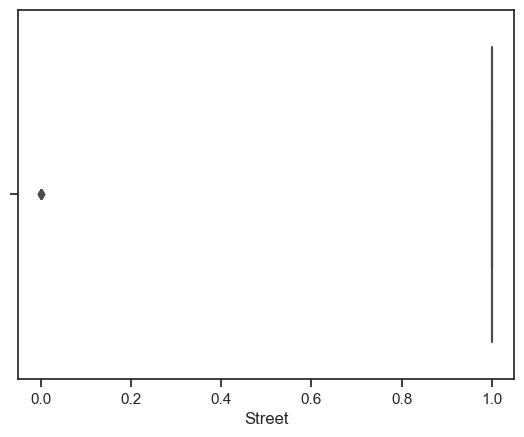

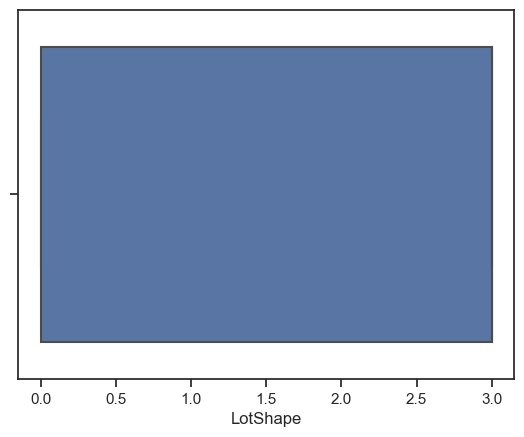

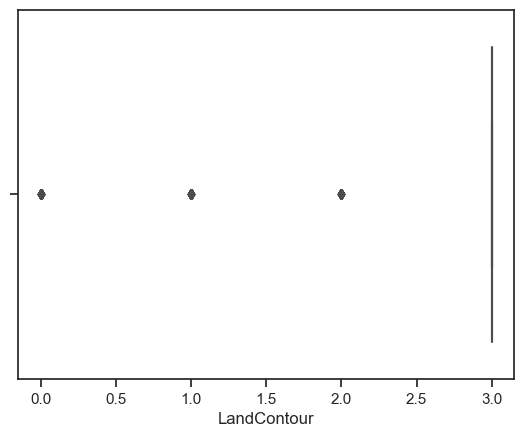

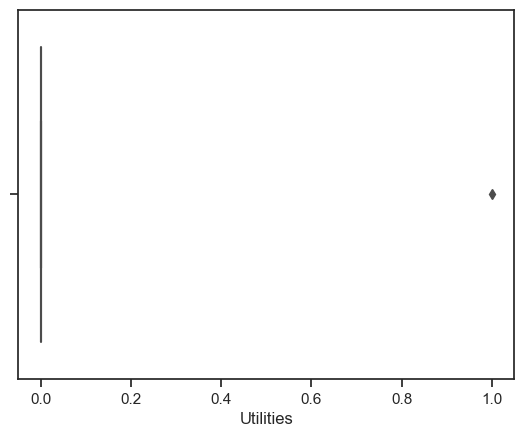

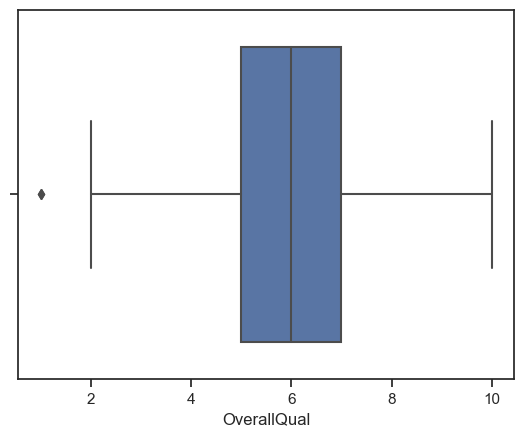

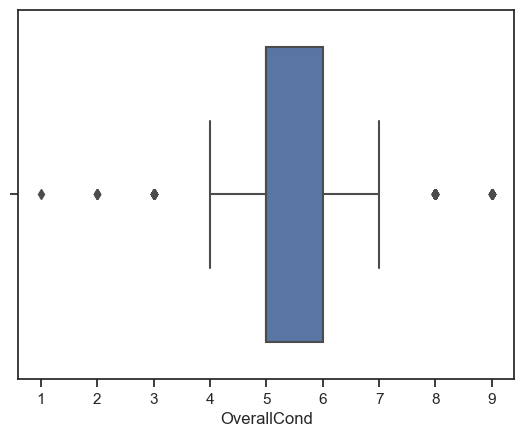

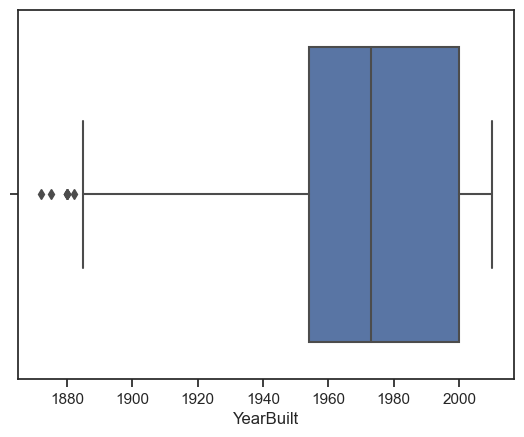

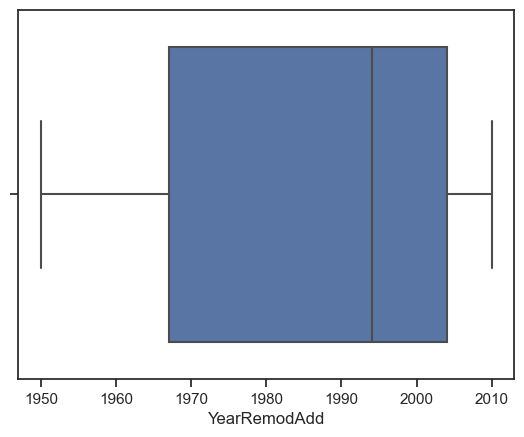

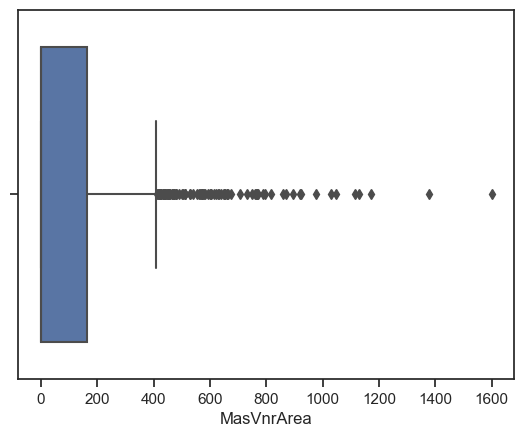

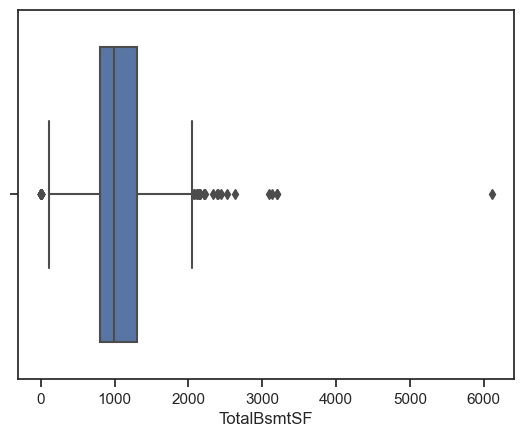

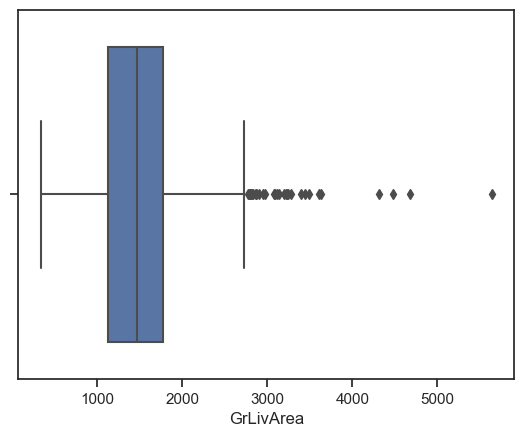

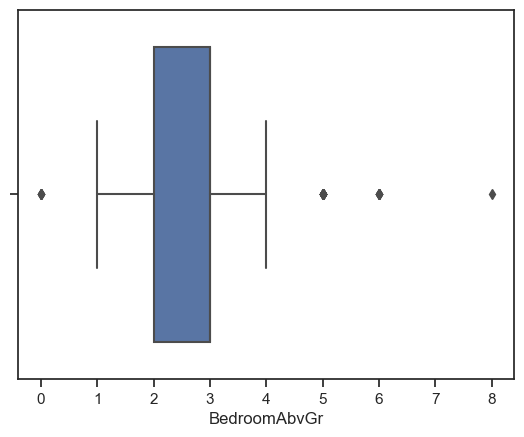

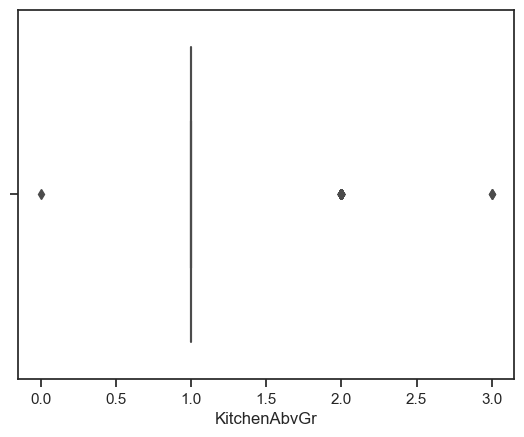

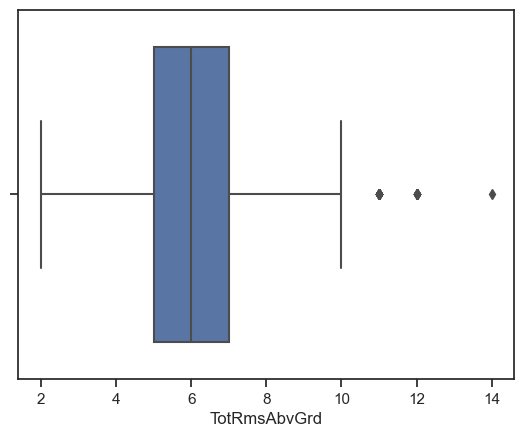

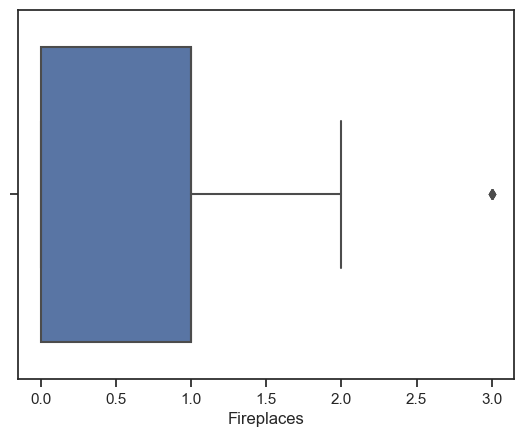

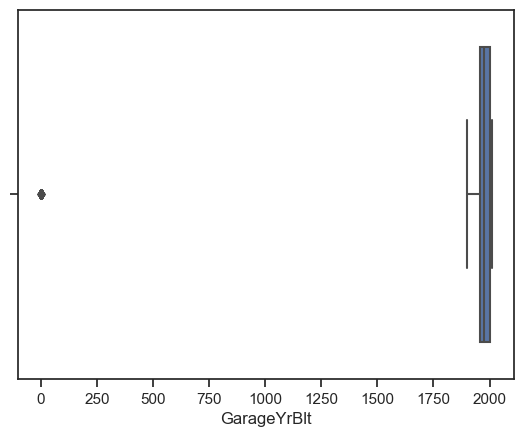

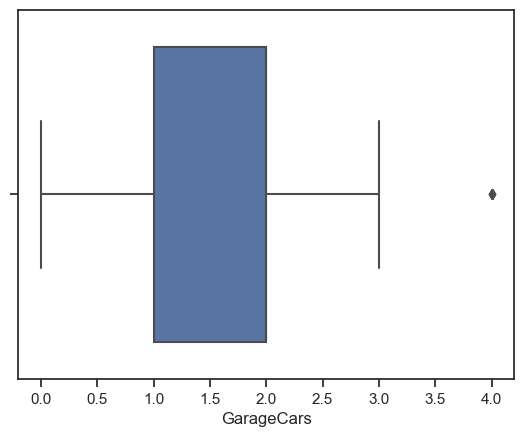

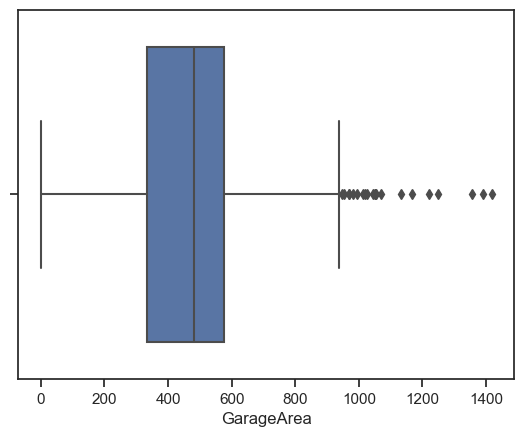

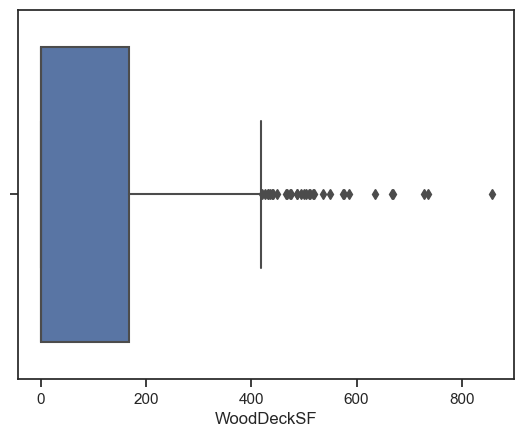

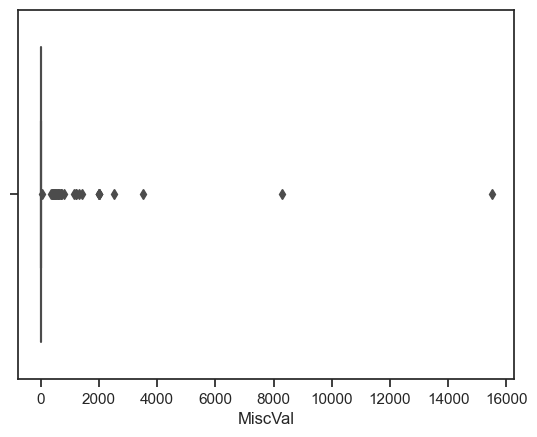

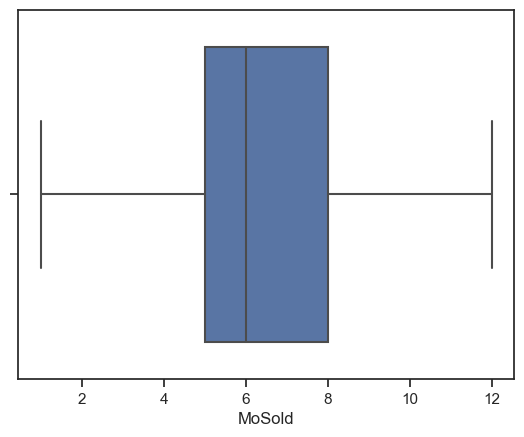

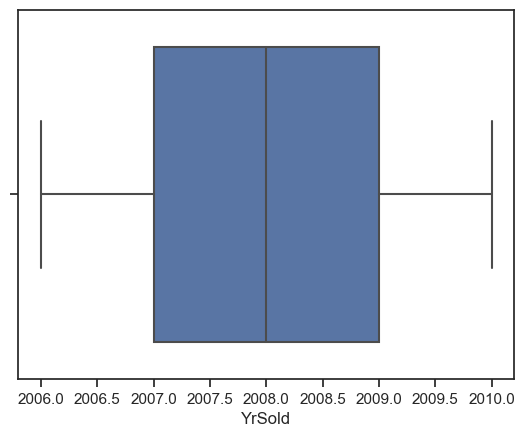

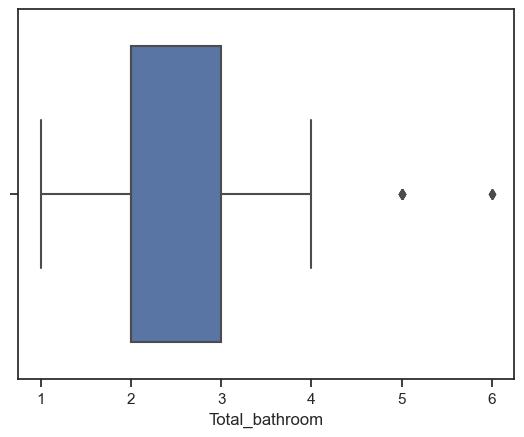

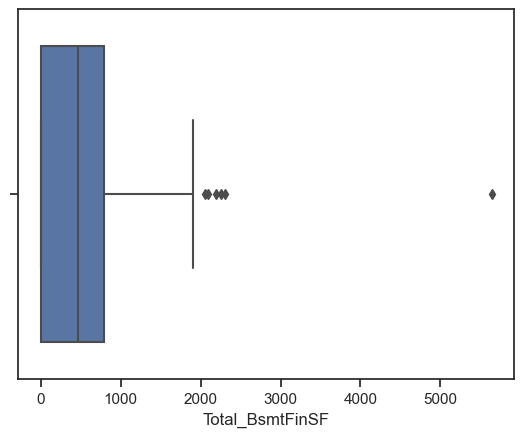

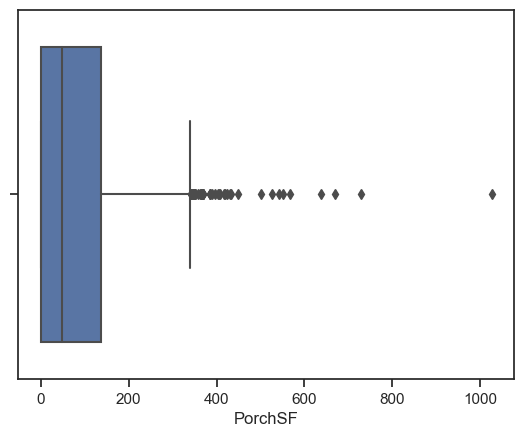

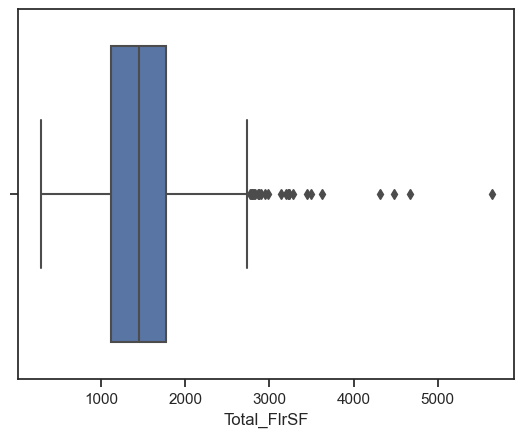

KeyError: 'SalePrice'

In [233]:
plt.figure(figsize=(5,5))
for i in numberic_featrue:
    sns.boxplot(trainx[i])
    plt.show()

In [234]:
## outliyers
numberic_featrue.remove('SalePrice')
dict = {}
for i in  numberic_featrue:
    percentile25 = trainx[i].quantile(0.25)
    percentile75 = trainx[i].quantile(0.75)
    IQR = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + i] = upper_limit
    dict['lower_limit'+ '_' + i] = lower_limit

In [235]:
print(dict)

{'upper_limit_MSSubClass': 145.0, 'lower_limit_MSSubClass': -55.0, 'upper_limit_MSZoning': 3.0, 'lower_limit_MSZoning': 3.0, 'upper_limit_LotFrontage': 134.5, 'lower_limit_LotFrontage': -13.5, 'upper_limit_LotArea': 17673.5, 'lower_limit_LotArea': 1481.5, 'upper_limit_Street': 1.0, 'lower_limit_Street': 1.0, 'upper_limit_LotShape': 7.5, 'lower_limit_LotShape': -4.5, 'upper_limit_LandContour': 3.0, 'lower_limit_LandContour': 3.0, 'upper_limit_Utilities': 0.0, 'lower_limit_Utilities': 0.0, 'upper_limit_OverallQual': 10.0, 'lower_limit_OverallQual': 2.0, 'upper_limit_OverallCond': 7.5, 'lower_limit_OverallCond': 3.5, 'upper_limit_YearBuilt': 2069.0, 'lower_limit_YearBuilt': 1885.0, 'upper_limit_YearRemodAdd': 2059.5, 'lower_limit_YearRemodAdd': 1911.5, 'upper_limit_MasVnrArea': 410.625, 'lower_limit_MasVnrArea': -246.375, 'upper_limit_TotalBsmtSF': 2052.0, 'lower_limit_TotalBsmtSF': 42.0, 'upper_limit_GrLivArea': 2747.625, 'lower_limit_GrLivArea': 158.625, 'upper_limit_BedroomAbvGr': 4.5,

In [236]:
trainx['MSSubClass'] = np.where(trainx['MSSubClass'] > 145.0, 145.0, trainx['MSSubClass'])

trainx['LotFrontage'] = np.where(trainx['LotFrontage'] > 145.0, 145.0, trainx['LotFrontage'])

trainx['LotArea'] = np.where(trainx['LotArea'] > 35500, 35500, trainx['LotArea'])

trainx['MasVnrArea'] = np.where(trainx['MasVnrArea'] > 750, 750, trainx['MasVnrArea'])

trainx['TotalBsmtSF'] = np.where(trainx['TotalBsmtSF'] > 2700, 2700, trainx['TotalBsmtSF'])

trainx['TotalBsmtSF'] = np.where(trainx['TotalBsmtSF'] > 2700, 2700, trainx['TotalBsmtSF'])

trainx['GrLivArea'] = np.where(trainx['GrLivArea'] > 3660, 3660, trainx['GrLivArea'])

trainx['GarageArea'] = np.where(trainx['GarageArea'] > 950, 950, trainx['GarageArea'])

trainx['WoodDeckSF'] = np.where(trainx['WoodDeckSF'] > 550, 550, trainx['WoodDeckSF'])

trainx['Total_BsmtFinSF'] = np.where(trainx['Total_BsmtFinSF'] > 1975.625, 1975.625, trainx['Total_BsmtFinSF'])

trainx['PorchSF'] = np.where(trainx['PorchSF'] > 450, 450, trainx['PorchSF'])

trainx['Total_FlrSF'] = np.where(trainx['Total_FlrSF'] > 3000, 3000, trainx['Total_FlrSF'])


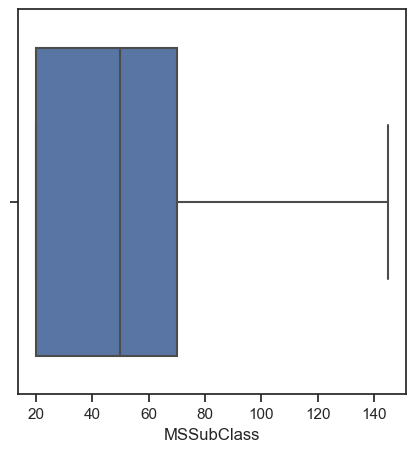

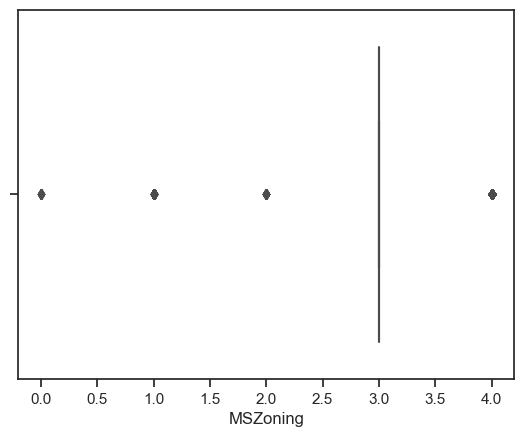

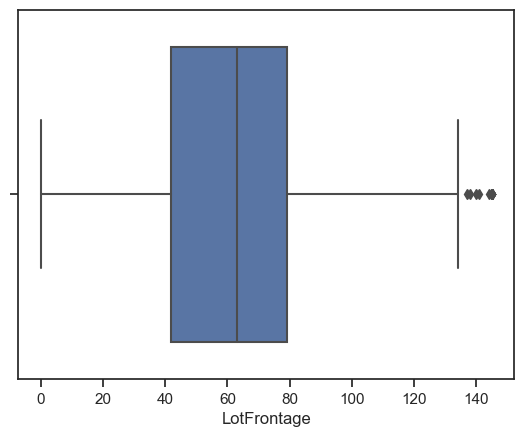

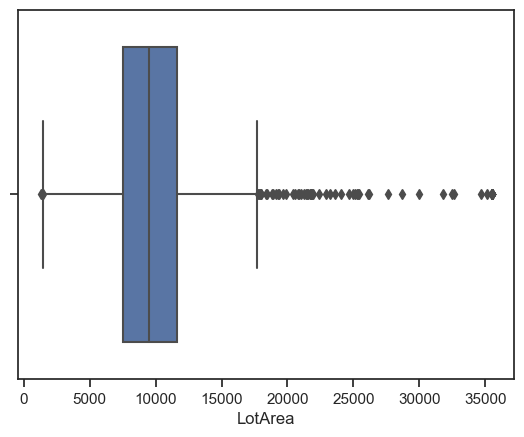

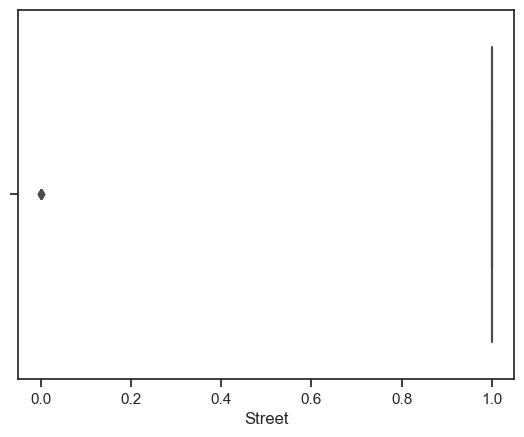

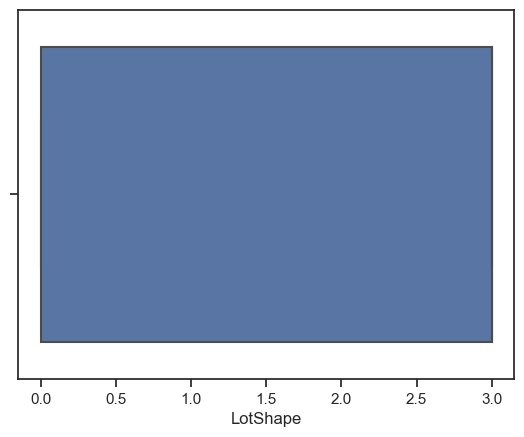

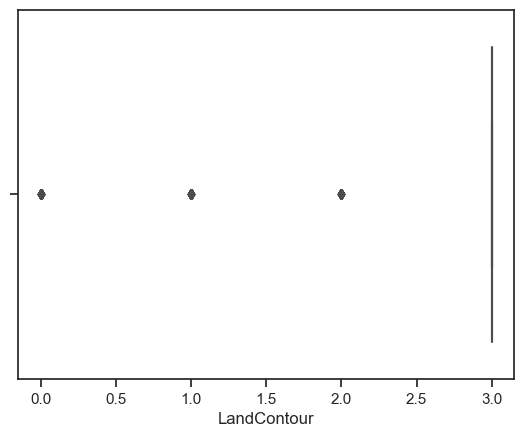

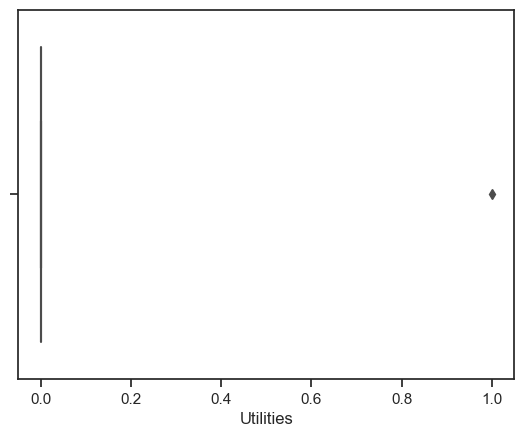

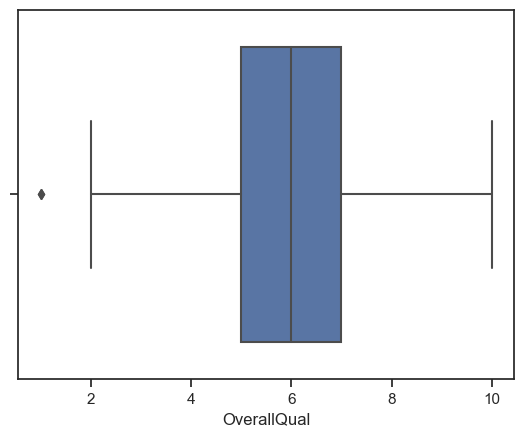

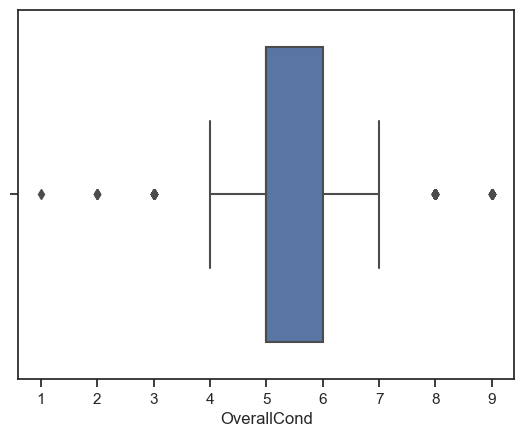

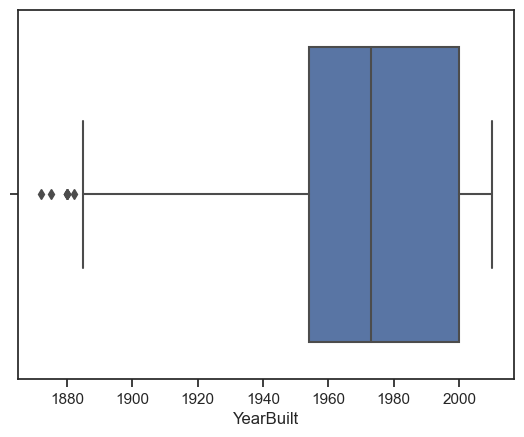

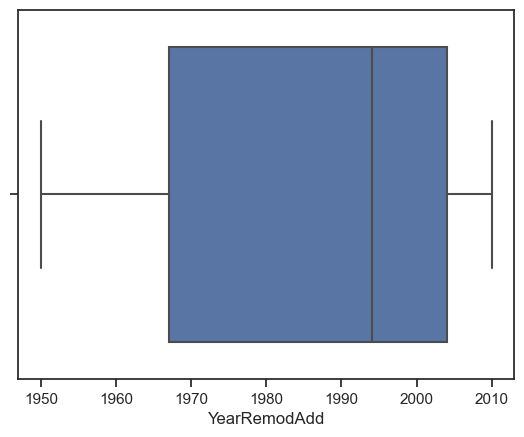

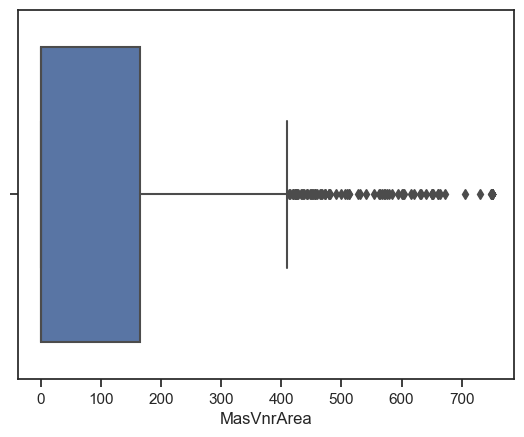

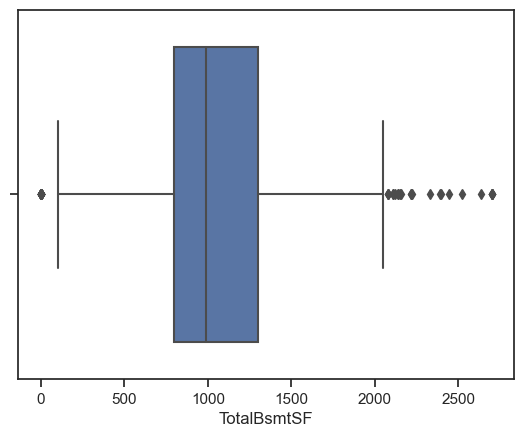

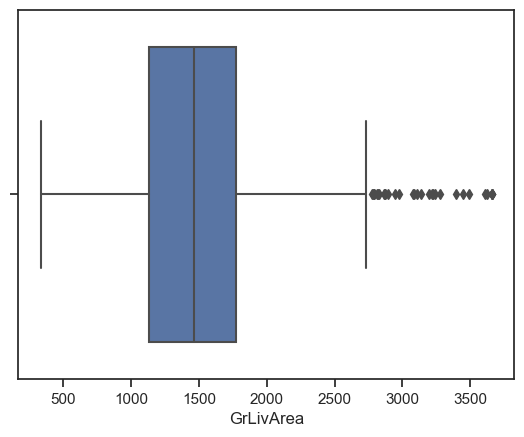

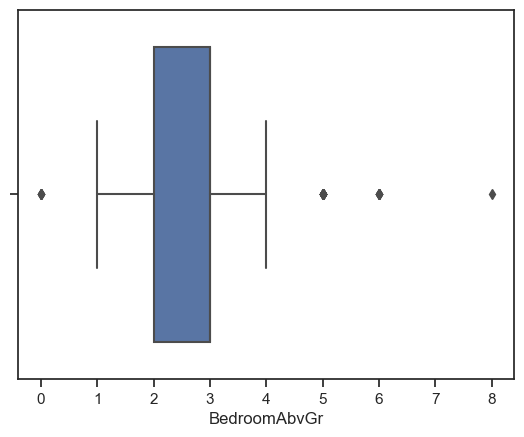

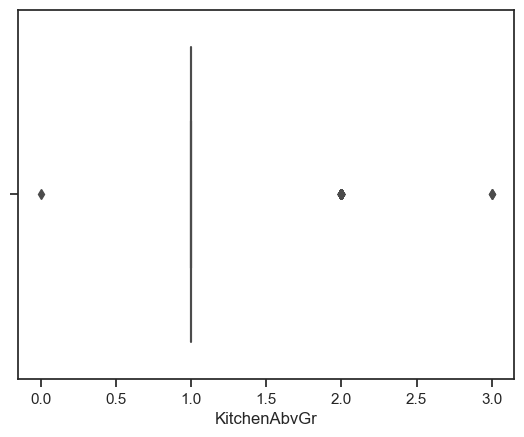

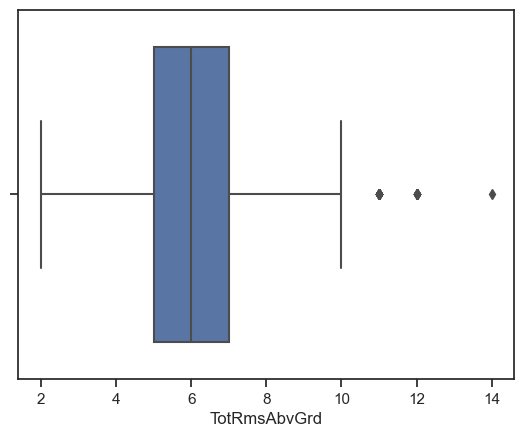

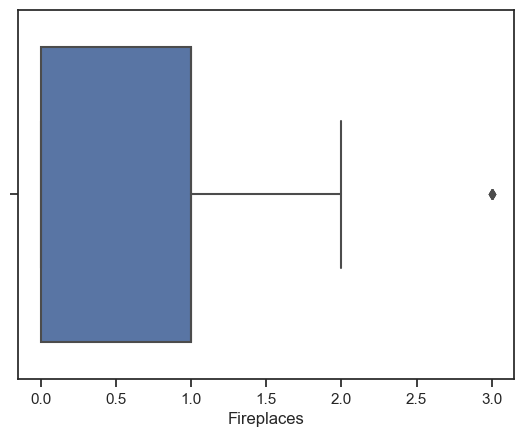

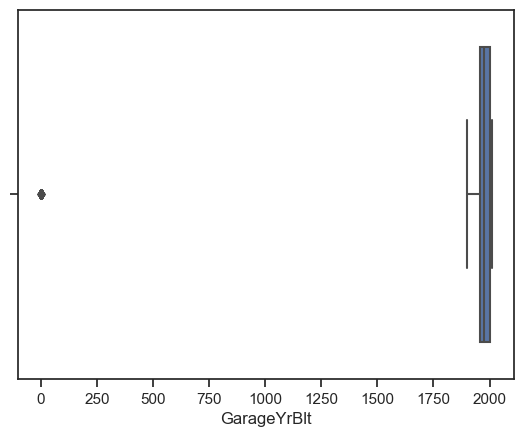

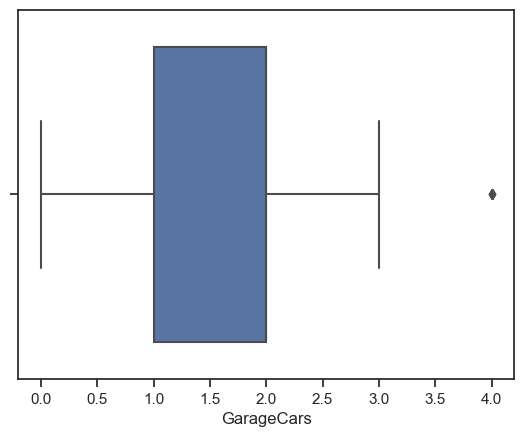

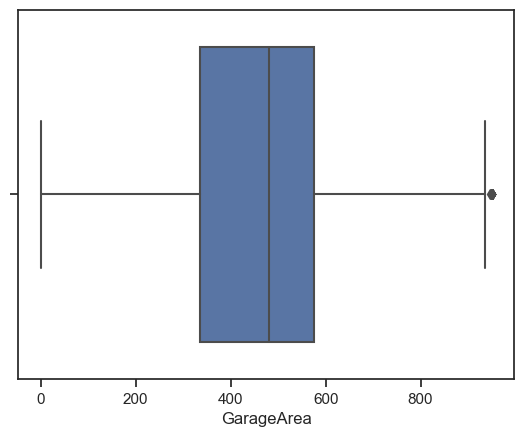

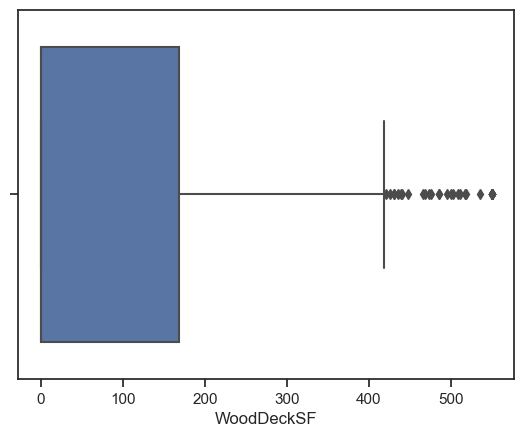

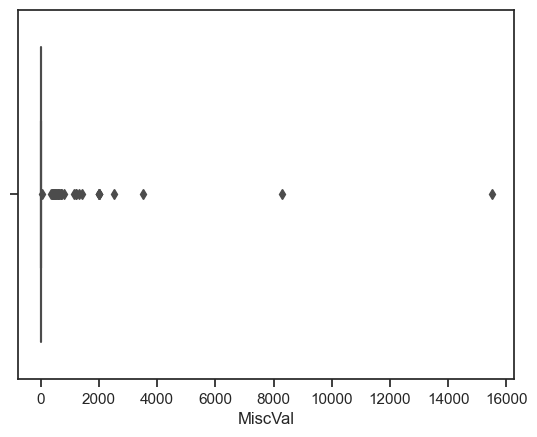

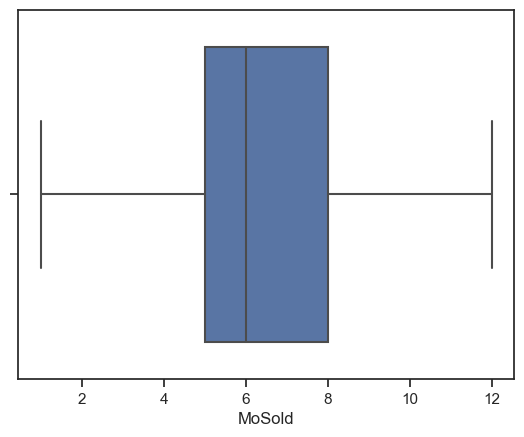

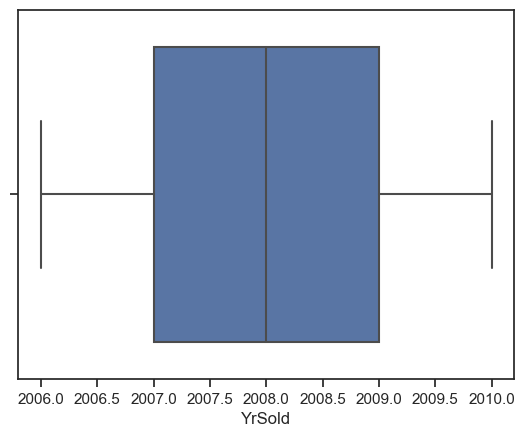

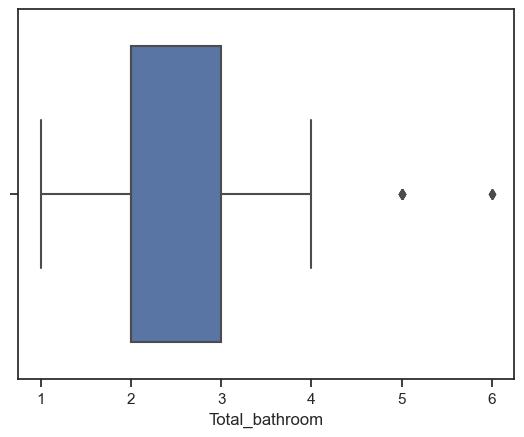

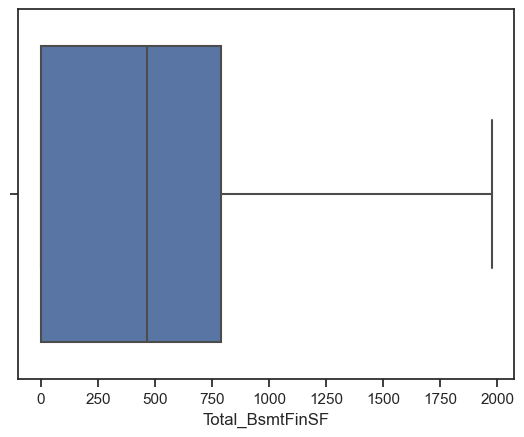

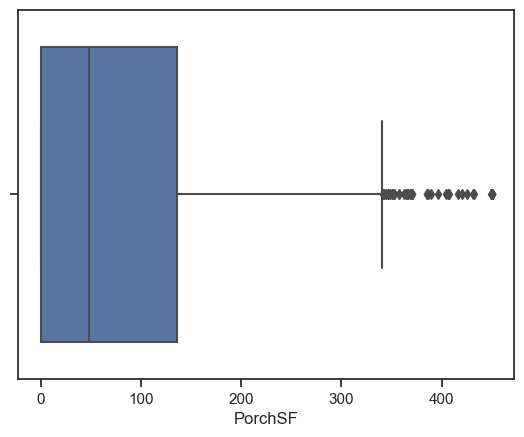

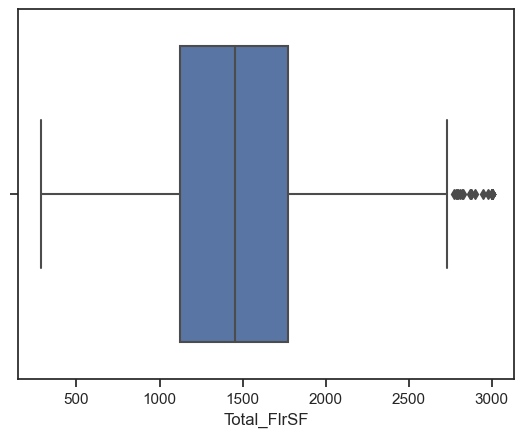

In [237]:
plt.figure(figsize=(5,5))
for i in numberic_featrue:
    sns.boxplot(trainx[i])
    plt.show()

In [238]:
trainx.drop(columns=['Street','Utilities', 'GarageYrBlt', 'MiscVal'], axis= 1, inplace= True)

In [239]:
testdata.drop(columns=['Street','Utilities', 'GarageYrBlt', 'MiscVal'], axis= 1, inplace= True)

<AxesSubplot:xlabel='SalePrice'>

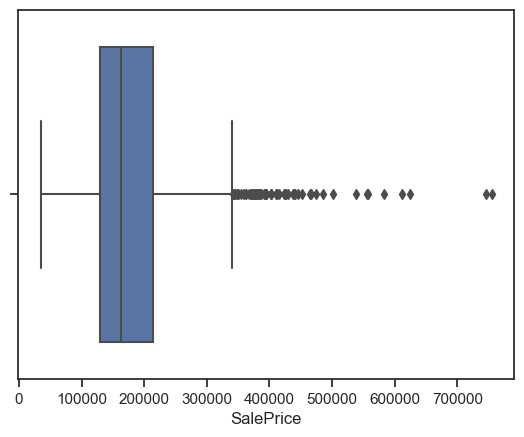

In [240]:
sns.boxplot(trainy)

In [241]:
trainy

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [242]:
trainy = np.where(trainy > 500000, 500000, trainy)

In [243]:
pd.set_option('display.max_rows', 500)
trainx.describe().transpose()

count     mean     std     min     25%     50%      75%  \
MSSubClass      1460.00    55.09   37.51   20.00   20.00   50.00    70.00   
MSZoning        1460.00     3.03    0.63    0.00    3.00    3.00     3.00   
LotFrontage     1460.00    57.29   33.18    0.00   42.00   63.00    79.00   
LotArea         1460.00 10040.01 4946.86 1300.00 7553.50 9478.50 11601.50   
LotShape        1460.00     1.94    1.41    0.00    0.00    3.00     3.00   
LandContour     1460.00     2.78    0.71    0.00    3.00    3.00     3.00   
LotConfig       1460.00     3.02    1.62    0.00    2.00    4.00     4.00   
LandSlope       1460.00     0.06    0.28    0.00    0.00    0.00     0.00   
Neighborhood    1460.00    12.25    6.01    0.00    7.00   12.00    17.00   
Condition1      1460.00     2.03    0.87    0.00    2.00    2.00     2.00   
Condition2      1460.00     2.01    0.26    0.00    2.00    2.00     2.00   
BldgType        1460.00     0.49    1.20    0.00    0.00    0.00     0.00   
HouseStyle      1460.00     3.04    1.91    0.00    2.00    2.00     5.00   
OverallQual     1460.00     6.10    1.38    1.00    5.00    6.00     7.00   
OverallCond     1460.00     5.58    1.11    1.00    5.00    5.00     6.00   
YearBuilt       1460.00  1971.27   30.20 1872.00 1954.00 1973.00  2000.00   
YearRemodAdd    1460.00  1984.87   20.65 1950.00 1967.00 1994.00  2004.00   
RoofStyle       1460.00     1.41    0.83    0.00    1.00    1.00     1.00   
RoofMatl        1460.00     1.08    0.60    0.00    1.00    1.00     1.00   
Exterior1st     1460.00     9.62    3.20    0.00    8.00   12.00    12.00   
Exterior2nd     1460.00    10.34    3.54    0.00    8.00   13.00    13.00   
MasVnrType      1460.00     1.76    0.61    0.00    1.00    2.00     2.00   
MasVnrArea      1460.00   100.11  165.70    0.00    0.00    0.00   164.25   
ExterQual       1460.00     2.54    0.69    0.00    2.00    3.00     3.00   
ExterCond       1460.00     3.73    0.73    0.00    4.00    4.00     4.00   
Foundation      1460.00     1.40    0.72    0.00    1.00    1.00     2.00   
BsmtQual        1460.00     2.72    1.28    0.00    2.00    2.00     4.00   
BsmtCond        1460.00     3.69    0.95    0.00    4.00    4.00     4.00   
BsmtExposure    1460.00     2.31    1.17    0.00    2.00    3.00     3.00   
BsmtFinType1    1460.00     3.15    2.25    0.00    1.00    2.00     6.00   
BsmtFinType2    1460.00     5.59    1.20    0.00    6.00    6.00     6.00   
BsmtUnfSF       1460.00   567.24  441.87    0.00  223.00  477.50   808.00   
TotalBsmtSF     1460.00  1053.83  414.82    0.00  795.75  991.50  1298.25   
Heating         1460.00     1.04    0.30    0.00    1.00    1.00     1.00   
HeatingQC       1460.00     1.54    1.74    0.00    0.00    0.00     4.00   
CentralAir      1460.00     0.93    0.25    0.00    1.00    1.00     1.00   
Electrical      1460.00     4.60    1.33    0.00    5.00    5.00     5.00   
GrLivArea       1460.00  1512.40  508.75  334.00 1129.50 1464.00  1776.75   
BedroomAbvGr    1460.00     2.87    0.82    0.00    2.00    3.00     3.00   
KitchenAbvGr    1460.00     1.05    0.22    0.00    1.00    1.00     1.00   
KitchenQual     1460.00     2.34    0.83    0.00    2.00    3.00     3.00   
TotRmsAbvGrd    1460.00     6.52    1.63    2.00    5.00    6.00     7.00   
Functional      1460.00     5.75    0.98    0.00    6.00    6.00     6.00   
Fireplaces      1460.00     0.61    0.64    0.00    0.00    1.00     1.00   
GarageType      1460.00     2.49    1.93    0.00    1.00    1.00     5.00   
GarageFinish    1460.00     1.88    1.19    0.00    1.00    2.00     3.00   
GarageCars      1460.00     1.77    0.75    0.00    1.00    2.00     2.00   
GarageArea      1460.00   470.84  207.49    0.00  334.50  480.00   576.00   
GarageQual      1460.00     4.72    0.90    0.00    5.00    5.00     5.00   
GarageCond      1460.00     4.76    0.80    0.00    5.00    5.00     5.00   
PavedDrive      1460.00     1.86    0.50    0.00    2.00    2.00     2.00   
WoodDeckSF    

In [247]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(trainx)

train_x = sc.transform(trainx)
test_x = sc.transform(testdata)

In [248]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

In [249]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_x,trainy,test_size=0.2,random_state=150)

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:17<00:00,  1.84s/it]


In [250]:
models

Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
PoissonRegressor                             0.90       0.92  22180.52   
GradientBoostingRegressor                    0.90       0.92  22399.83   
LGBMRegressor                                0.88       0.91  24258.62   
HistGradientBoostingRegressor                0.88       0.91  24430.75   
ExtraTreesRegressor                          0.88       0.90  25051.39   
HuberRegressor                               0.88       0.90  25066.18   
PassiveAggressiveRegressor                   0.87       0.90  25460.07   
RandomForestRegressor                        0.87       0.90  25485.26   
RidgeCV                                      0.87       0.90  25913.79   
BayesianRidge                                0.87       0.90  25972.19   
LassoLars                                    0.87       0.89  26002.87   
Ridge                                        0.87       0.89  26017.66   
Lasso                                        0.87       0.89  26104.44   
GammaRegressor                               0.87       0.89  26109.30   
LinearRegression                             0.87       0.89  26174.63   
TransformedTargetRegressor                   0.87       0.89  26174.63   
BaggingRegressor                             0.86       0.89  26263.41   
XGBRegressor                                 0.86       0.89  26433.68   
LassoLarsIC                                  0.86       0.89  26530.28   
SGDRegressor                                 0.86       0.89  26968.82   
LassoCV                                      0.86       0.89  27117.57   
Lars                                         0.85       0.88  27227.65   
LassoLarsCV                                  0.85       0.88  27314.35   
ElasticNet                                   0.85       0.88  28060.50   
TweedieRegressor                             0.82       0.86  30070.60   
LarsCV                                       0.81       0.85  31104.94   
OrthogonalMatchingPursuitCV                  0.80       0.84  32072.68   
OrthogonalMatchingPursuit                    0.80       0.84  32072.68   
AdaBoostRegressor                            0.79       0.84  32571.65   
RANSACRegressor                              0.79       0.83  32647.47   
ExtraTreeRegressor                           0.79       0.83  32807.93   
KNeighborsRegressor                          0.77       0.82  34031.65   
DecisionTreeRegressor                        0.75       0.80  35988.89   
ElasticNetCV                                -0.01       0.20  71783.90   
DummyRegressor                              -0.26      -0.00  80216.90   
NuSVR                                       -0.27      -0.01  80533.76   
SVR                                         -0.30      -0.04  81618.39   
QuantileRegressor                           -0.31      -0.04  81643.86   
KernelRidge                                 -5.66      -4.29 184471.55   
MLPRegressor                                -6.36      -4.84 193868.29   
GaussianProcessRegressor                    -6.42      -4.89 194695.61   
LinearSVR                                   -6.47      -4.93 195303.04   

                               Time Taken  
Model                                      
PoissonRegressor                     0.09  
GradientBoostingRegressor            0.65  
LGBMRegressor                        0.14  
HistGradientBoostingRegressor        1.54  
ExtraTreesRegressor                  1.42  
HuberRegressor                       0.08  
PassiveAggressiveRegressor           0.13  
RandomForestRegressor                1.09  
RidgeCV                              0.03  
BayesianRidge                        0.07  
LassoLars                            0.03  
Ridge                                0.01  
Lasso                                0.07  
GammaRegressor                       0.02  
LinearRegression                     0.02  
TransformedTargetRegressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

In [88]:
# testing with test data
GBR = GradientBoostingRegressor()
GBR.fit(train_x,trainy)
y_pred = GBR.predict(test_x)

In [84]:
from sklearn.linear_model import PoissonRegressor

pr = PoissonRegressor()
pr.fit(train_x,trainy)
y_pred = pr.predict(test_x)

In [89]:
y_pred = pd.DataFrame(y_pred)

In [90]:
sub = pd.read_csv("D:/kaggle project/sample_submission.csv")
datasets = pd.concat([sub['Id'],y_pred],axis = 1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('D:\kaggle project'+'//'+'sample_submission_predicted_new.csv', index = False )